## 1.0 package import and data preparing

In [1]:
#Import libraries
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
input_folder = 'input'

expression_set1 = "ComKeyCDEG_UC1_expr.txt"
expression_set2 = "ComKeyDEG_UC1_expr.txt"
label1 = "Info_UC1.csv"

input_expr1 = os.path.join(input_folder, expression_set1)
input_expr2 = os.path.join(input_folder, expression_set2)
expr_data1 = pd.read_csv(input_expr1, sep='\t', index_col=0)
expr_data2 = pd.read_csv(input_expr2, sep='\t', index_col=0)

labels_file = os.path.join(input_folder, 'Info_UC1.csv') 
labels = pd.read_csv(labels_file)

In [3]:
# labels
colsel= 'Diagnosis'
label_1 = 'Ulcerative Colitis (UC)'
label_2 = 'Normal'

labels_filtered = labels[labels[colsel].isin([label_1, label_2])]
samples_to_keep = labels_filtered['Samples'].values

expr_filtered1 = expr_data1[samples_to_keep]
expr_filtered2 = expr_data2[samples_to_keep]

# expr_filtered = expr_filtered.sort_index(axis=0)
labels_filtered = labels_filtered.set_index('Samples').loc[samples_to_keep]

# 97 cases, 11 controls, 108 samples. 

In [4]:
expr_filtered1t = expr_filtered1.T
expr_filtered1t['Class'] = labels_filtered['Diagnosis']
expr_filtered1t.head()

gene_symbol,PTGR1,FOSB,CXCL5,MMP3,CXCL1,SAA1,Class
GSM2332098,11.0209,6.5327,3.7899,4.3531,6.3874,6.9356,Normal
GSM2332099,11.0712,5.5309,4.7177,5.6114,6.5977,7.2770,Normal
GSM2332100,11.0479,5.5971,6.7218,4.0543,7.8922,9.1830,Normal
GSM2332101,10.7795,6.2008,3.4804,3.9390,8.0531,6.3950,Normal
GSM2332102,10.8922,7.9777,3.4905,5.0423,6.8332,6.2928,Normal


In [5]:
expr_filtered2t = expr_filtered2.T
expr_filtered2t['Class'] = labels_filtered['Diagnosis']
expr_filtered2t.head()

gene_symbol,PTGR1,FOSB,CXCL5,MMP3,SLC6A14,DUOX2,Class
GSM2332098,11.0209,6.5327,3.7899,4.3531,5.1263,4.1860,Normal
GSM2332099,11.0712,5.5309,4.7177,5.6114,4.9179,4.3268,Normal
GSM2332100,11.0479,5.5971,6.7218,4.0543,4.4610,9.4619,Normal
GSM2332101,10.7795,6.2008,3.4804,3.9390,3.8974,4.8728,Normal
GSM2332102,10.8922,7.9777,3.4905,5.0423,5.3296,6.0604,Normal


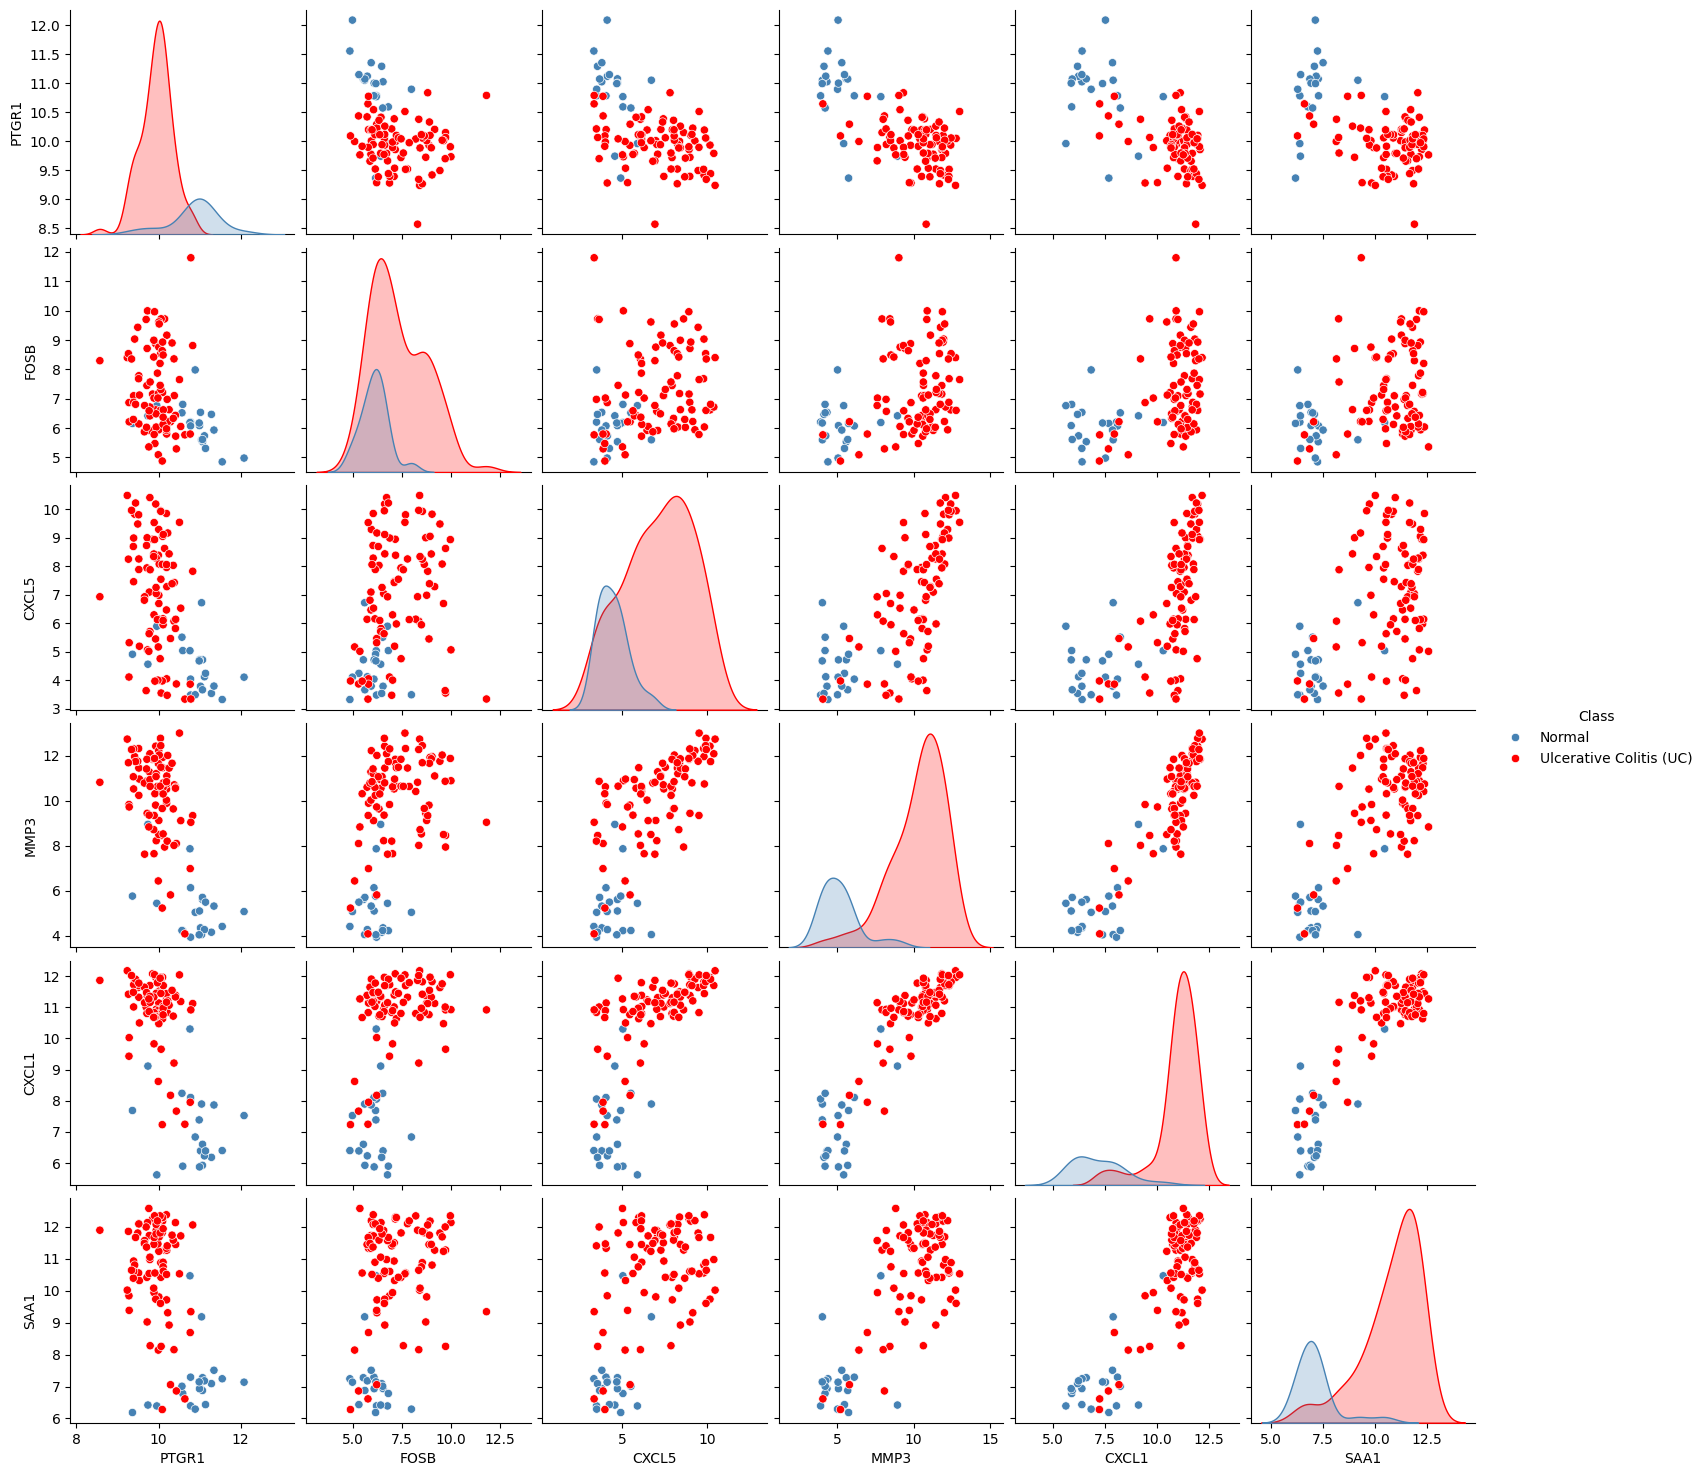

In [6]:
# expr_data1
# color set ###########################################

Colors_set3_NAG_AG =['SteelBlue','r']


# Colors_set3_NAG_AG =['r','SteelBlue']
sns.pairplot(expr_filtered1t, hue = 'Class', palette = Colors_set3_NAG_AG, diag_kind='kde') 
# sns_plot.savefig('PUC_pairwiseplotKeyCDEG.pdf')
# sns_plot.savefig('PUC_pairwiseplotKeyCDEG.png')

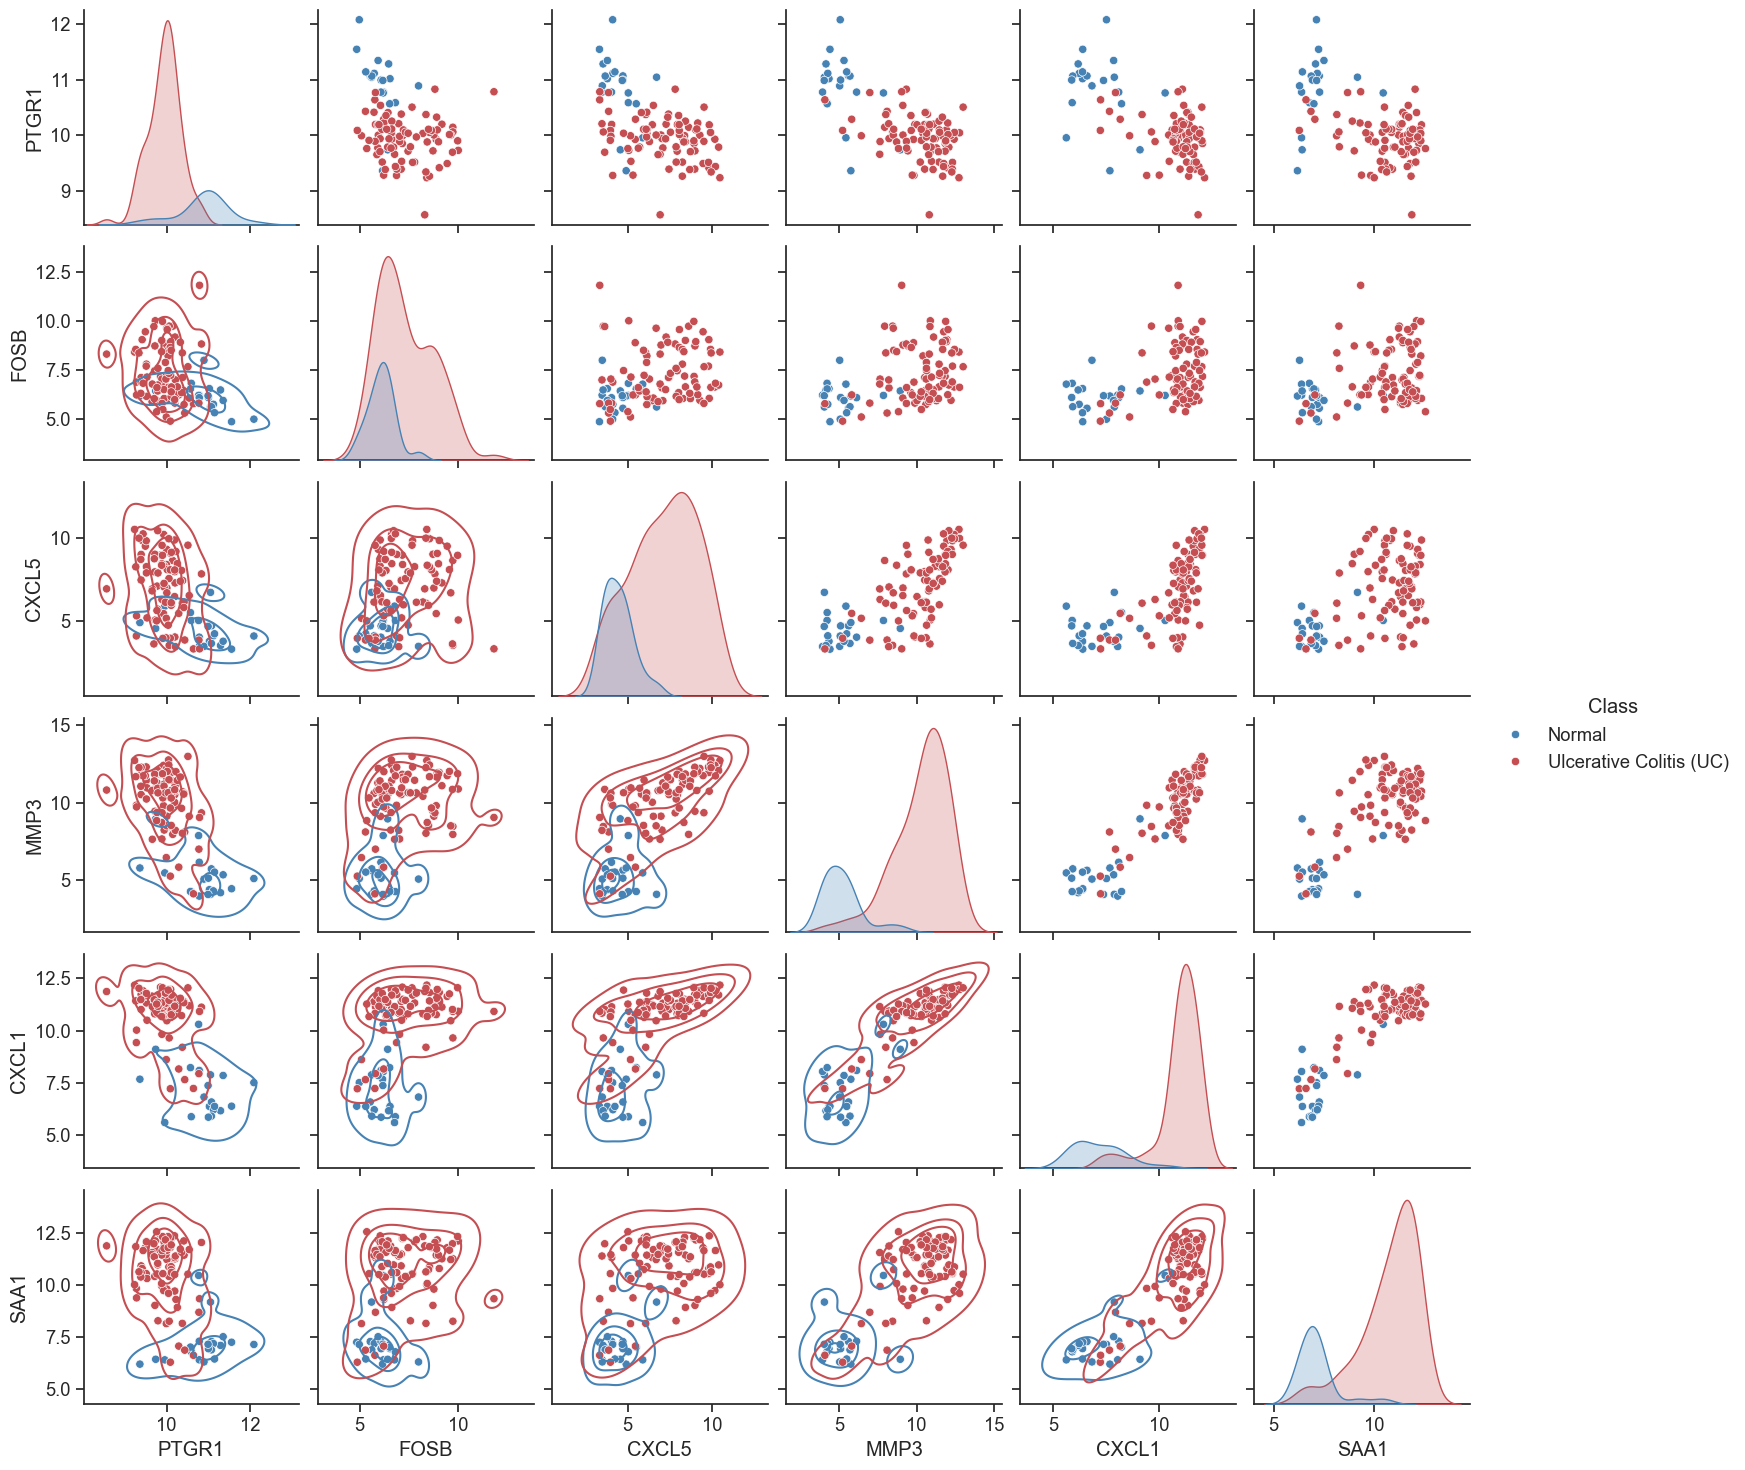

In [7]:
mpl.style.use('ggplot') # print(plt.style.available)
# sns.set(style="ticks", color_codes=True)
sns.set(style="ticks",font_scale=1.2, color_codes=True)
# Create the default pairplot   
# sns.color_palette(['red','blue'])
# sns.color_palette("RdBu_r", 2)
sns_plot = sns.pairplot(expr_filtered1t, hue = 'Class', palette = Colors_set3_NAG_AG, diag_kind='kde') 
sns_plot.map_lower(sns.kdeplot, levels=4, color=".2")
## kde - (kernel density estimation) 
# sns_plot.savefig("Fig_Pair_output.pdf")
# plt.text(-94,56, "A", fontsize = 30, fontweight='bold')
sns_plot.savefig('PUC_pairwiseplotKeyCDEG.pdf')
sns_plot.savefig('PUC_pairwiseplotKeyCDEG.png')

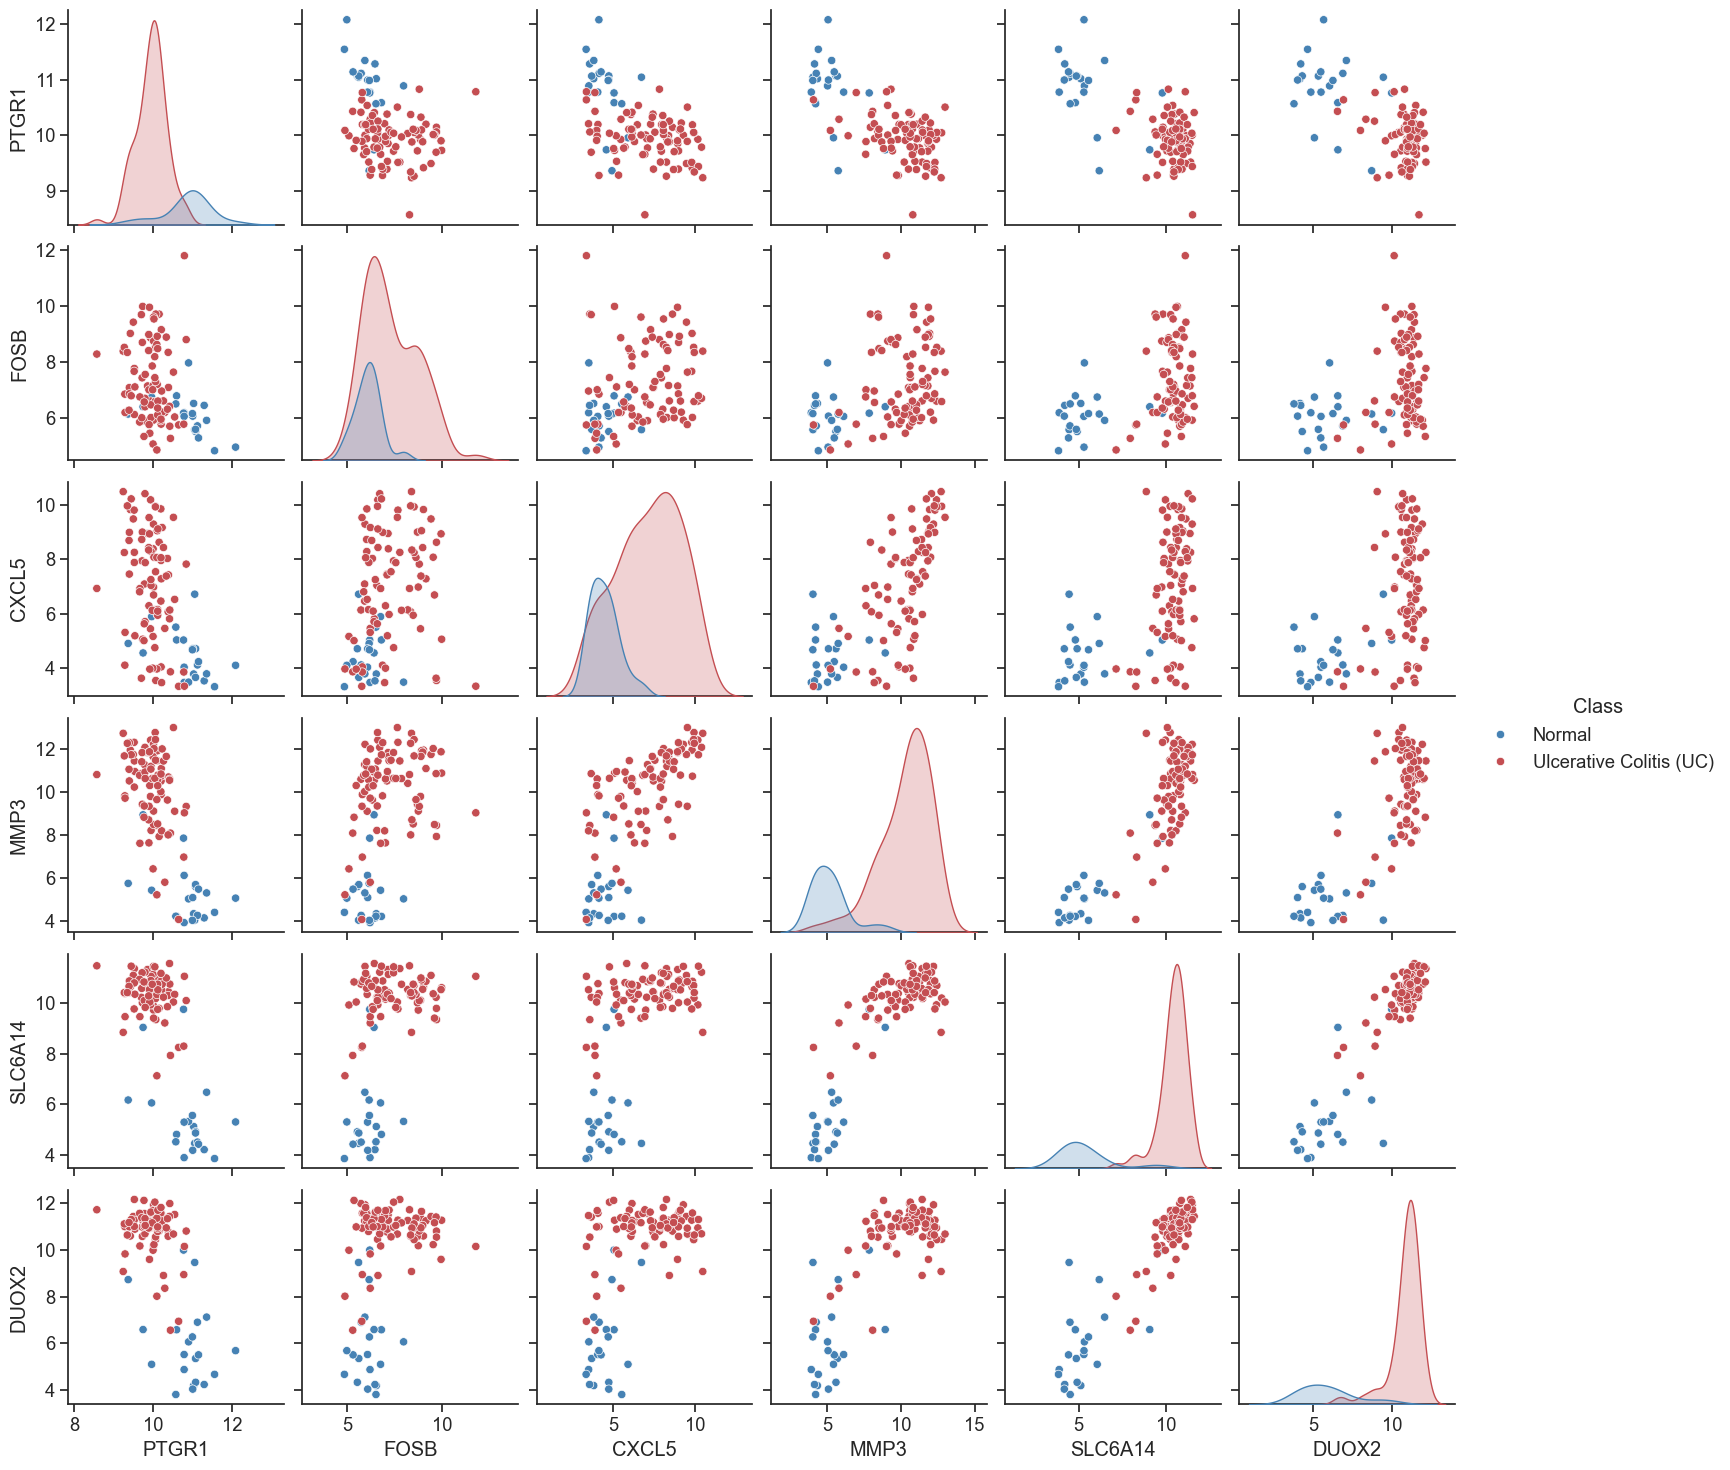

In [8]:
Colors_set3_NAG_AG =['SteelBlue','r']
# Colors_set3_NAG_AG =['r','SteelBlue']
sns.pairplot(expr_filtered2t, hue = 'Class', palette = Colors_set3_NAG_AG, diag_kind='kde') 
# sns_plot.savefig('PUC_pairwiseplotKeyDEG.pdf')
# sns_plot.savefig('PUC_pairwiseplotKeyDEG.png')

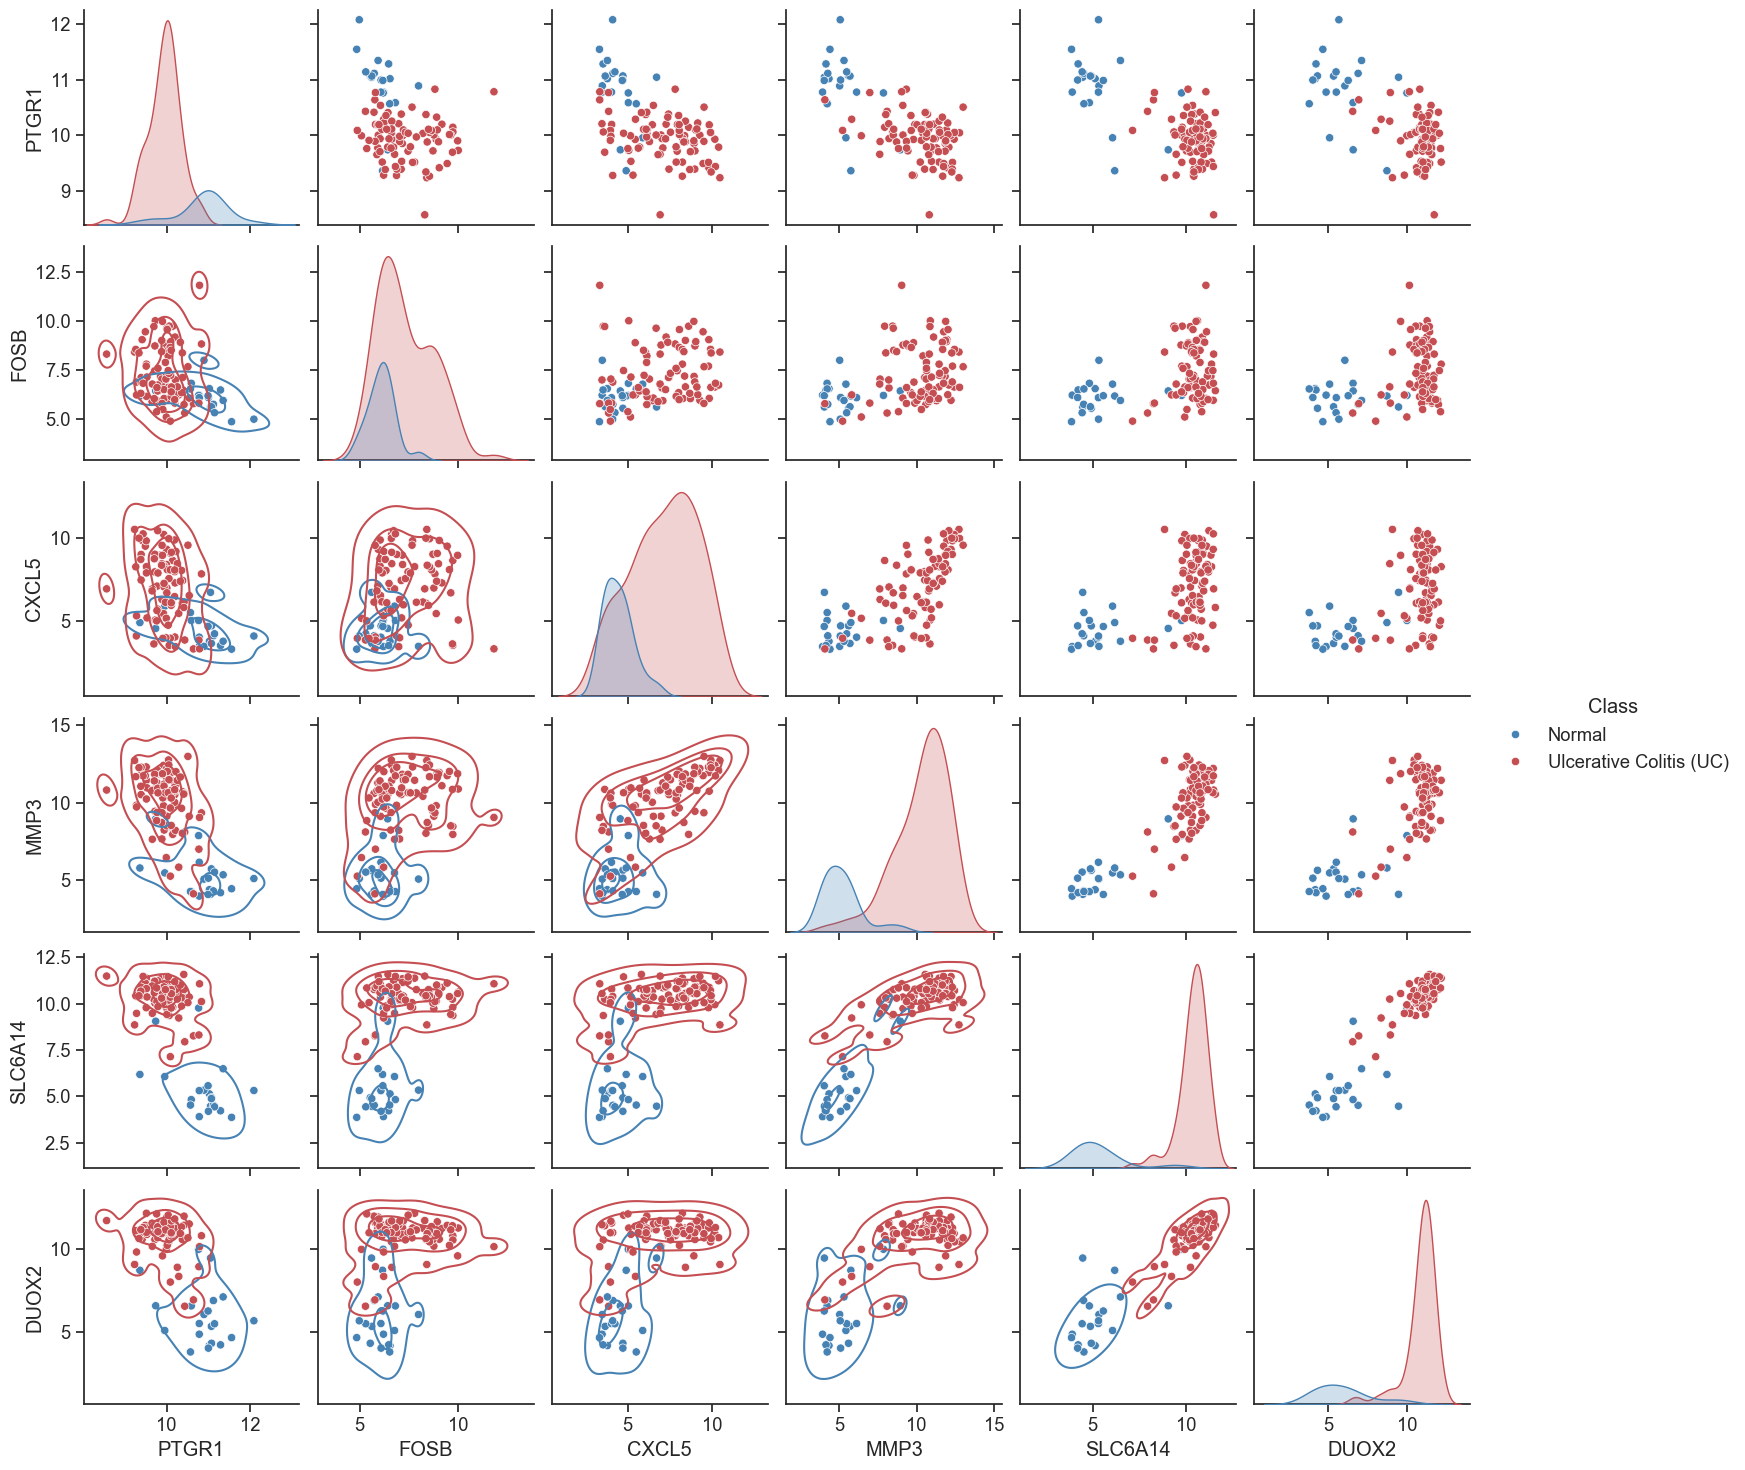

In [9]:
mpl.style.use('ggplot') # print(plt.style.available)
# sns.set(style="ticks", color_codes=True)
sns.set(style="ticks",font_scale=1.2, color_codes=True)
# Create the default pairplot   
# sns.color_palette(['red','blue'])
# sns.color_palette("RdBu_r", 2)
sns_plot = sns.pairplot(expr_filtered2t, hue = 'Class', palette = Colors_set3_NAG_AG, diag_kind='kde') 
sns_plot.map_lower(sns.kdeplot, levels=4, color=".2")
## kde - (kernel density estimation) 
# sns_plot.savefig("Fig_Pair_output.pdf")
# plt.text(-94,56, "A", fontsize = 30, fontweight='bold')
sns_plot.savefig('PUC_pairwiseplotKeyDEG.pdf')
sns_plot.savefig('PUC_pairwiseplotKeyDEG.png')

## 1.0 figure version two

C:\Users\Felix\AppData\Local\Temp\ipykernel_22560\2265758482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expr_filtered1t_f[' '] = expr_filtered1t['Class']


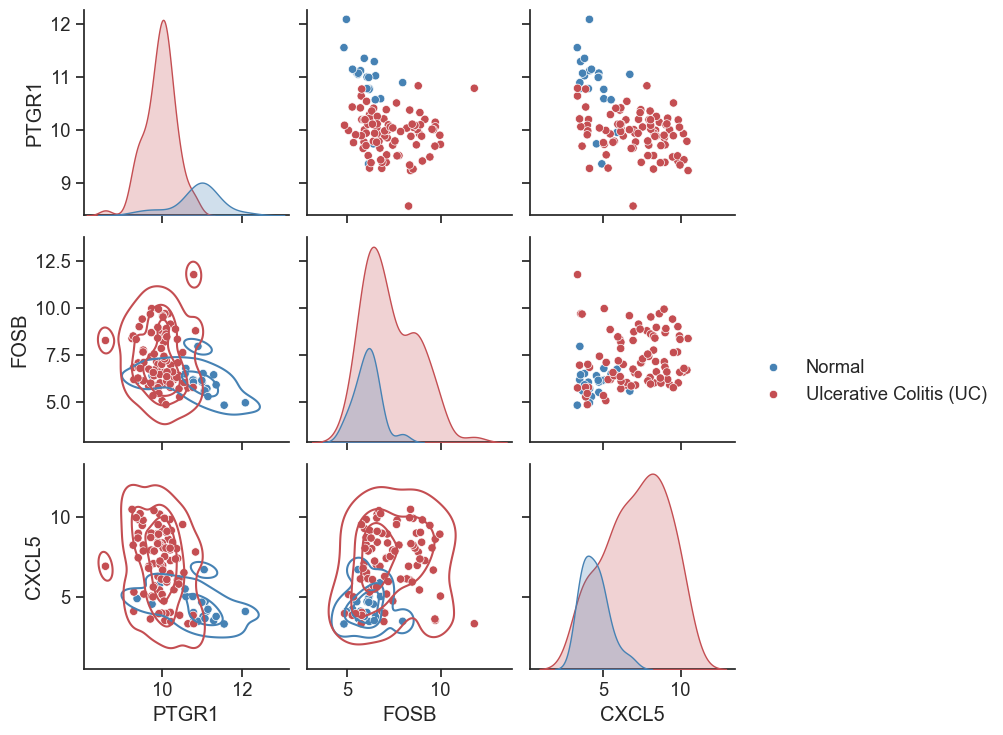

In [22]:
expr_filtered1t_f = expr_filtered1t.iloc[:,0:3]
expr_filtered1t_f[' '] = expr_filtered1t['Class']
expr_filtered1t_f

mpl.style.use('ggplot') # print(plt.style.available)
# sns.set(style="ticks", color_codes=True)
sns.set(style="ticks",font_scale=1.2, color_codes=True)
# Create the default pairplot   
# sns.color_palette(['red','blue'])
# sns.color_palette("RdBu_r", 2)
sns_plot = sns.pairplot(expr_filtered1t_f, hue = ' ', palette = Colors_set3_NAG_AG, diag_kind='kde') 
sns_plot.map_lower(sns.kdeplot, levels=4, color=".2")
## kde - (kernel density estimation) 
# sns_plot.savefig("Fig_Pair_output.pdf")
# plt.text(-94,56, "A", fontsize = 30, fontweight='bold')
sns_plot.savefig('PUC_pairwiseplotKey.pdf')
sns_plot.savefig('PUC_pairwiseplotKey.png')
